In [39]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import pylab as pl

In [179]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden = nn.Linear(6, 4)
        self.output = nn.Linear(4, 1)
        
    def forward(self, X):
        sigmoid = torch.sigmoid
        out = sigmoid(self.hidden(X))
        
        return sigmoid(self.output(out))
    

class Load_matrix(DataLoader):
    """
    Simple dataloader given a matrix with input output pairs
    """
    def __init__(self, X, y=None):
        self.X = torch.tensor(X)
        self.y = torch.Tensor(y)
            
    def __len__(self):
        return self.X.size()[0]
    
    def __getitem__(self, index):
        return self.X[index, :], self.y[index]


def is_symmetric(x):
    for i in range(len(x)//2):
        if x[i] != x[-(i+1)]:
            return 0
    return 1
    
def create_symmetrical_vectors(size=6):
    X = torch.empty((2**size, size))
    
    x = torch.arange((2**size))
    for n in range(size):
        m = 2**(n+1)
        # I don't know why this works
        X[:, n] = x%m > 2**n - 1
        
    y = torch.Tensor([is_symmetric(X[i, :]) for i in range(2**size)])
    
    return X, y

X, y = create_symmetrical_vectors(6)
dataset = Load_matrix(X, y)
train = DataLoader(dataset, batch_size=64)

<ipython-input-179-d802d80a2d9f>:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.X = torch.tensor(X)


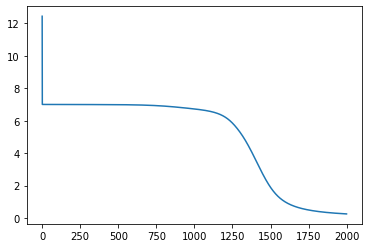

In [187]:
net = MLP()

criterion = nn.MSELoss(reduction="sum")
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

losses = []
n_epochs = 2000
for epoch in range(n_epochs):
    for data in train:
        inputs, labels = data
        optimizer.zero_grad()
        
        outputs = net(inputs).ravel()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())
        
pl.plot(losses)

In [188]:
torch.sum((net(X).ravel() - y)**2)/64

tensor(0.0039, grad_fn=<DivBackward0>)

To get the same results of the paper we must train multiple times our model

In [189]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[-3.3184,  6.4990,  3.0688, -3.3791, -6.5461,  2.8939],
        [-0.3761,  1.4526, -4.4371, -5.0403, -1.4185,  1.1402],
        [ 0.0591,  2.7793,  2.8033, -0.0442, -2.8068,  2.8684],
        [ 5.7977, -2.3215, -1.5462,  0.9158,  2.3248,  5.1423]],
       requires_grad=True)
Parameter containing:
tensor([-2.6861,  0.7987, -3.1767, -1.2023], requires_grad=True)
Parameter containing:
tensor([[-11.5512,   6.0985,   9.4167,  -6.4311]], requires_grad=True)
Parameter containing:
tensor([-0.2493], requires_grad=True)
